In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

data=pd.read_csv('C:/Users/Virag/Desktop/Machine Learning/practice2/data/heart_disease.csv')
labels=data.values[:,-1]
labels[labels>2]=2
labels=labels.astype(int)

data=data.values[:,:-1]

#Add bias beforehand
data = np.hstack((np.ones((data.shape[0],1)),data))

In [2]:
# Only run before decision boundary visualization
data=data[:,[4,8]]

In [3]:
#Standardize data (substract mean divide with std)
data=(data-np.mean(data))/np.std(data)

In [4]:
def train_test_split(data,labels,test_ratio=0.2):
    idxs=np.arange(data.shape[0])
    np.random.shuffle(idxs)
    test_idxs=idxs[:round(len(idxs)*test_ratio)]
    train_idxs=idxs[round(len(idxs)*test_ratio):]
    return data[train_idxs],labels[train_idxs],data[test_idxs],labels[test_idxs]
    

In [5]:
def visualize(data, labels,predictor):
    import matplotlib.pyplot as plt
    min1, max1 = data[:, 0].min()-data[:, 0].min()*0.1, data[:, 0].max()+data[:, 0].max()*0.1
    min2, max2 = data[:, 1].min()-data[:, 1].min()*0.1, data[:, 1].max()+data[:, 1].max()*0.1
    # define the x and y scale
    x1grid = np.arange(min1, max1, np.abs(max1-min1)*0.001)
    x2grid = np.arange(min2, max2, np.abs(max2-min2)*0.001)
    # create all of the lines and rows of the grid
    xx, yy = np.meshgrid(x1grid, x2grid)
    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    # horizontal stack vectors to create x1,x2 input for the model
    grid = np.hstack((r1,r2))
    # make predictions for the grid
    yhat = predictor.predict(grid)
    # reshape the predictions back into a grid
    zz = yhat.reshape(xx.shape)
    # plot the grid of x, y and z values as a surface
    plt.contourf(xx, yy, zz, cmap='Paired')
    # create scatter plot for samples from each class
    for class_value in np.unique(labels):
        # get row indexes for samples with this class
        row_ix = np.where(labels == class_value)
        # create scatter of these samples
        plt.scatter(data[row_ix, 0], data[row_ix, 1], cmap='Paired')
    plt.tight_layout()


In [9]:
class LogisticRegression():
    def __init__(self):
        self.w = None
    def fit(self,data,labels,test_data,test_labels,max_iterations=500):
        X=data
        Y=labels
        step_size=0.05
        batch_size=32
        N = X.shape[0]
        Y = Y.squeeze()
        assert Y.shape == (N,), (Y.shape, N)

        def gen_batches():
            inds = np.arange(N)
            np.random.shuffle(inds)
            if batch_size is None:
                yield inds
            else:
                for i in range(0, N, batch_size):
                    yield inds[i:i + batch_size]

        # Initialise w
        self.w = np.zeros((X.shape[1],len(np.unique(Y))))
        for it in range(max_iterations):
            # Train on the permuted dataset
            avg_error = 0
            for batch_inds in gen_batches():
                x = X[batch_inds, ...]
                y = Y[batch_inds]
                y_hat = self.predict(x)
                e_in_hat = self.cross_entropy(y,y_hat)
                gradient_hat = self.error_gradient(x, y,y_hat)
                avg_error += np.average(e_in_hat)
                # Update
                self.w -= step_size * gradient_hat.T
            avg_error /= N
            Y_hat = (self.predict(X) > 0.5).astype(int)
            accuracy = self.accuracy(Y,Y_hat)
            test_Y_hat= (self.predict(test_data) > 0.5).astype(int)
            test_accuracy = self.accuracy(test_labels,test_Y_hat)
            print(f'Iteration #{it}: average error: {avg_error:0.2f}  '
                  f'train accuracy: {accuracy:0.02f}'
                 f'test accuracy: {test_accuracy:0.02f}')
        #self.w=w

    def softmax(self,x):
        f_x = np.exp(x) / np.sum(np.exp(x))
        return f_x


    def cross_entropy(self,true,prediction):
        return -np.sum(true,axis=0)*np.log2(prediction + 0.00001)

    def error_gradient(self,data,true,prediction):
        column_vector = np.array(true, ndmin=2).T
        return np.transpose((np.subtract(prediction,column_vector)))@data

    def predict(self,data):
        return np.rint(self.softmax(data @ self.w))
    def accuracy(self,true,prediction):
        return np.mean(true == prediction)
 

In [10]:
train_data,train_labels,test_data,test_labels = train_test_split(data,labels)
lr=LogisticRegression()
lr.fit(train_data,train_labels,test_data,test_labels)
prediction_in=lr.predict(train_data)
prediction_out=lr.predict(test_data)
print(lr.accuracy(train_labels,prediction_in))
print(lr.accuracy(test_labels,prediction_out))


C:\Users\Virag\AppData\Local\Temp/ipykernel_19756/1121678066.py:61: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  return np.mean(true == prediction)
C:\Users\Virag\AppData\Local\Temp/ipykernel_19756/1121678066.py:47: RuntimeWarning: overflow encountered in exp
  f_x = np.exp(x) / np.sum(np.exp(x))
C:\Users\Virag\AppData\Local\Temp/ipykernel_19756/1121678066.py:47: RuntimeWarning: invalid value encountered in true_divide
  f_x = np.exp(x) / np.sum(np.exp(x))


Iteration #0: average error: 11.53  train accuracy: 0.00test accuracy: 0.00
Iteration #1: average error: 11.53  train accuracy: 0.00test accuracy: 0.00
Iteration #2: average error: 11.53  train accuracy: 0.00test accuracy: 0.00
Iteration #3: average error: 11.53  train accuracy: 0.00test accuracy: 0.00
Iteration #4: average error: nan  train accuracy: 0.00test accuracy: 0.00
Iteration #5: average error: nan  train accuracy: 0.00test accuracy: 0.00
Iteration #6: average error: nan  train accuracy: 0.00test accuracy: 0.00
Iteration #7: average error: nan  train accuracy: 0.00test accuracy: 0.00
Iteration #8: average error: nan  train accuracy: 0.00test accuracy: 0.00
Iteration #9: average error: nan  train accuracy: 0.00test accuracy: 0.00
Iteration #10: average error: nan  train accuracy: 0.00test accuracy: 0.00
Iteration #11: average error: nan  train accuracy: 0.00test accuracy: 0.00
Iteration #12: average error: nan  train accuracy: 0.00test accuracy: 0.00
Iteration #13: average erro

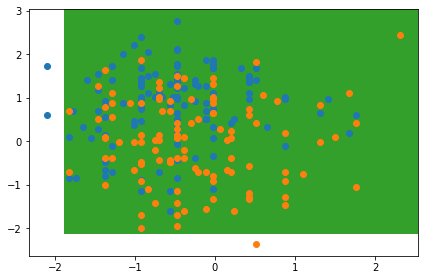

In [8]:
visualize(train_data,train_labels,lr)